In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution among rating agencies

In [2]:

df = pd.read_csv('input//corporateCreditRatingWithFinancialRatios.csv')
print(df['Rating Agency'].unique())
print(df['Rating Agency'].value_counts())
print('-'*50)
print(df['Corporation'].nunique())
df.reset_index(inplace = True, drop=True)

["Standard & Poor's Ratings Services" 'DBRS' "Moody's Investors Service"
 'Fitch Ratings' 'Japan Credit Rating Agency,Ltd.'
 'HR Ratings de Mexico S.A. de C.V.' 'Egan-Jones Ratings Company']
Egan-Jones Ratings Company            2826
Standard & Poor's Ratings Services    2813
Moody's Investors Service             1636
Fitch Ratings                          477
DBRS                                    26
Japan Credit Rating Agency,Ltd.         22
HR Ratings de Mexico S.A. de C.V.        5
Name: Rating Agency, dtype: int64
--------------------------------------------------
1377


In [3]:
print(f"Der Datensatz hat {df.shape[0]} Zeilen und {df.shape[1]} Spalten.\n")

Der Datensatz hat 7805 Zeilen und 25 Spalten.



### Grade distirbution

In [4]:
df.Rating.value_counts().sort_index()

A       836
A+      478
A-      722
AA      185
AA+      73
AA-     254
AAA      90
B       310
B+      422
B-      288
BB      453
BB+     545
BB-     427
BBB     910
BBB+    846
BBB-    705
C        11
CC       18
CC+       1
CCC      65
CCC+    151
CCC-     10
D         5
Name: Rating, dtype: int64

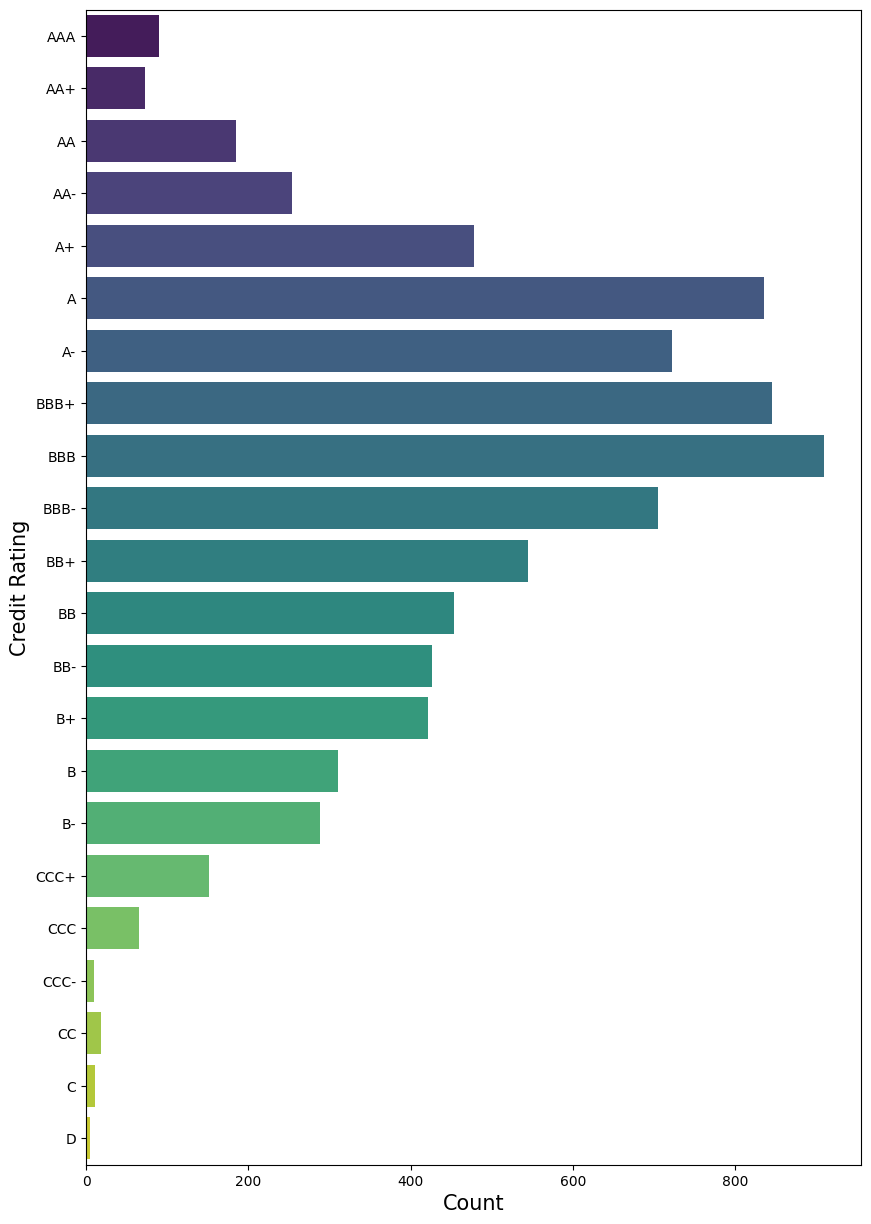

In [5]:
ratings_order = ['D', 'C', 'CC', 'CCC-', 'CCC', 'CCC+', 'B-', 'B', 'B+', 'BB-', 'BB', 'BB+', 
                 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+', 'AA-', 'AA', 'AA+', 'AAA']

ratings_order.reverse()

df['Rating'] = pd.Categorical(df['Rating'], categories=ratings_order, ordered=True)

plt.figure(figsize=(10, 15))
sns.countplot(data=df, y='Rating', order=ratings_order, palette='viridis')
# plt.title('Distribution of S&P Credit Ratings', fontsize=20)
plt.ylabel('Credit Rating', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.show()



### Create Rating classes for better model performance

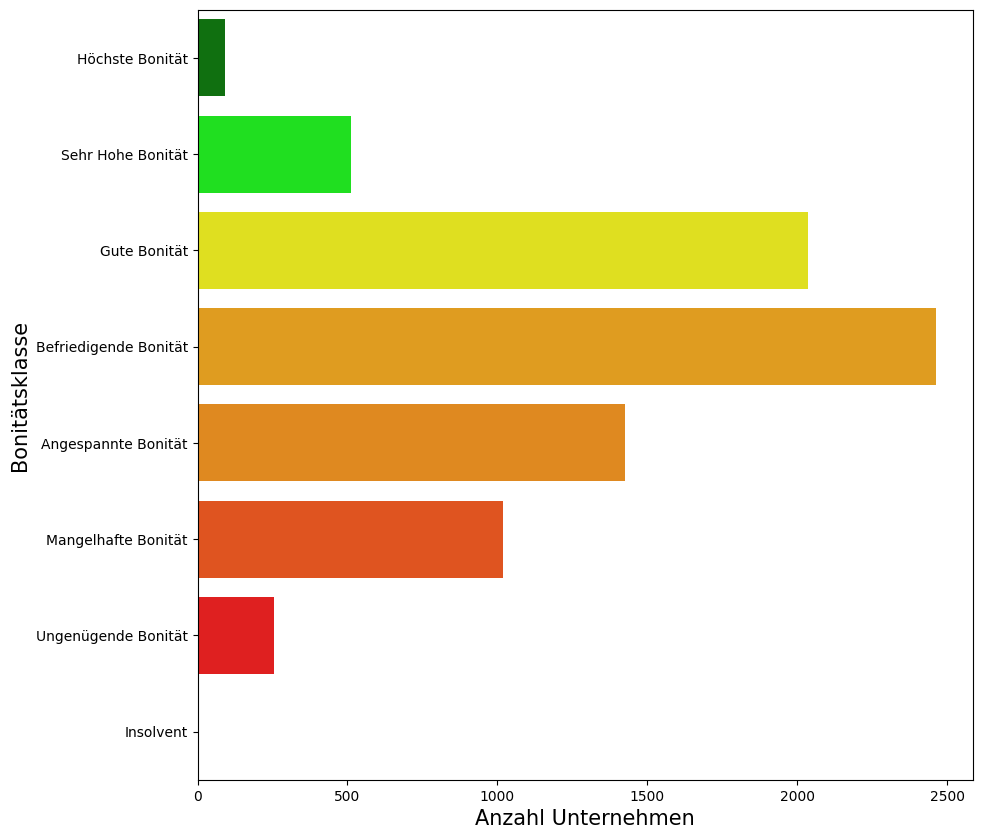

In [6]:
rating_mapping = {
    'AAA': 'Höchste Bonität', 'AA+': 'Sehr Hohe Bonität', 'AA': 'Sehr Hohe Bonität', 'AA-': 'Sehr Hohe Bonität', 
    'A+': 'Gute Bonität', 'A': 'Gute Bonität', 'A-': 'Gute Bonität', 
    'BBB+': 'Befriedigende Bonität', 'BBB': 'Befriedigende Bonität', 'BBB-': 'Befriedigende Bonität', 
    'BB+': 'Angespannte Bonität', 'BB': 'Angespannte Bonität', 'BB-': 'Angespannte Bonität',
    'B+': 'Mangelhafte Bonität', 'B': 'Mangelhafte Bonität', 'B-': 'Mangelhafte Bonität',
    'CCC+': 'Ungenügende Bonität', 'CCC': 'Ungenügende Bonität', 'CCC-': 'Ungenügende Bonität', 
    'CC': 'Ungenügende Bonität', 'C': 'Ungenügende Bonität', 
    'D': 'Insolvent'
}


df['Rating Category'] = df['Rating'].map(rating_mapping)


category_order = ['Höchste Bonität', 'Sehr Hohe Bonität', 'Gute Bonität', 'Befriedigende Bonität', 'Angespannte Bonität', 'Mangelhafte Bonität', 'Ungenügende Bonität', 
                  'Insolvent']

df['Rating Category'] = pd.Categorical(df['Rating Category'], categories=category_order, ordered=True)


color_palette = ['green', 'lime', 'yellow', 'orange', 'darkorange', 'orangered', 'red', 'darkred']

plt.figure(figsize=(10, 10))
sns.countplot(data=df, y='Rating Category', order=category_order, palette=color_palette)
# plt.title('Gruppierte Verteilung der S&P Bonitätseinstufungen im Testdatensatz', fontsize=20)
plt.ylabel('Bonitätsklasse', fontsize=15)
plt.xlabel('Anzahl Unternehmen', fontsize=15)
plt.show()


In [7]:
df.Sector.value_counts()

german_sectors = {'Other': 'Andere', 'Manuf': 'Herstellung', 'BusEq': 'Geschäftsausstattung', 'Utils': 'Versorgung', 'Shops': 'Einzelhandel',
                   'Enrgy': 'Energie', 'Hlth': 'Gesundheit', 'NoDur': 'Verbrauchsmaterial', 'Telcm': 'Telekommunikation', 'Chems': 'Chemie', 
                   'Durbl': 'Gebrauchsgüter', 'Money': 'Finanzen'}

df = df.replace({'Sector': german_sectors})

### Rating category distribution among the sectors

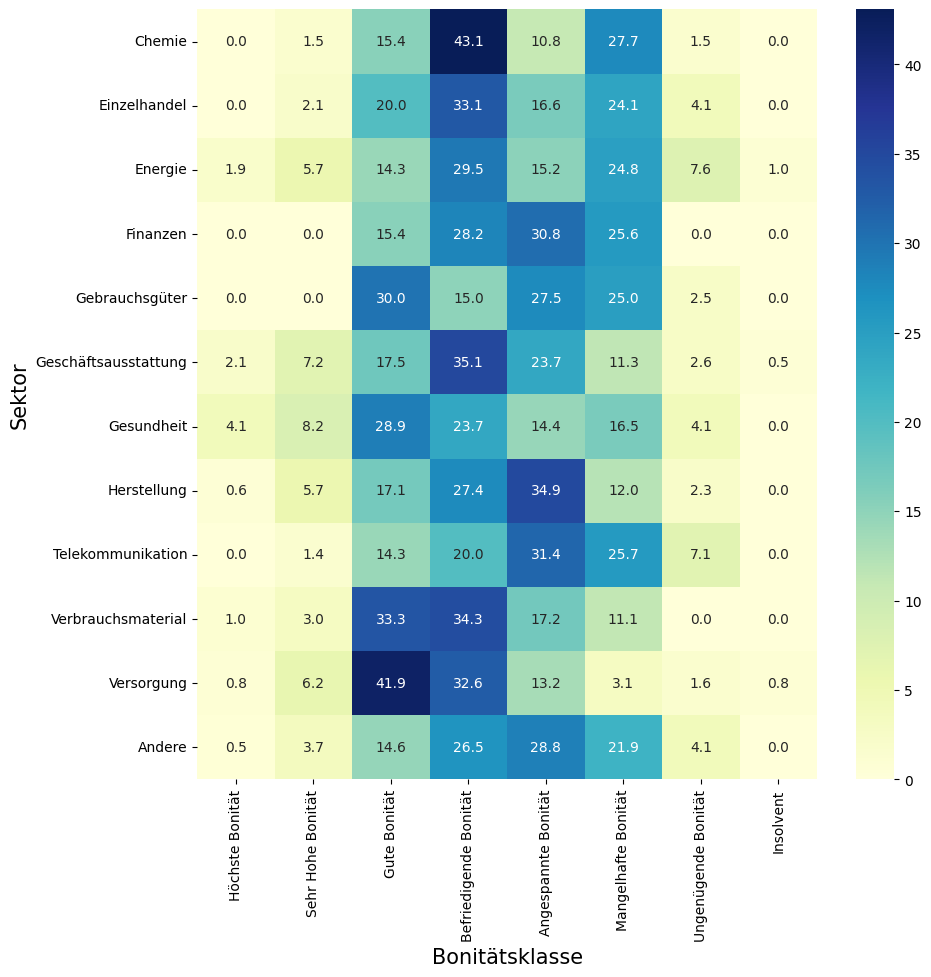

In [11]:

cross_tab = pd.crosstab(df['Sector'], df['Rating Category'], normalize='index')


cross_tab *= 100

cross_tab = cross_tab.loc[[c for c in cross_tab.index if c != 'Andere'] + ['Andere']]


plt.figure(figsize=(10, 10))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, cbar=True, fmt=".1f")
# plt.title('Heatmap of Percentage Distribution of S&P Credit Ratings Across Sectors', fontsize=20)
# plt.title('Heatmap der prozentualen Verteilung von S&P Ratings über die Sektoren', fontsize=20)
plt.ylabel('Sektor', fontsize=15)
plt.xlabel('Bonitätsklasse', fontsize=15)
plt.show()

### Correlation analysis with confusion matrix

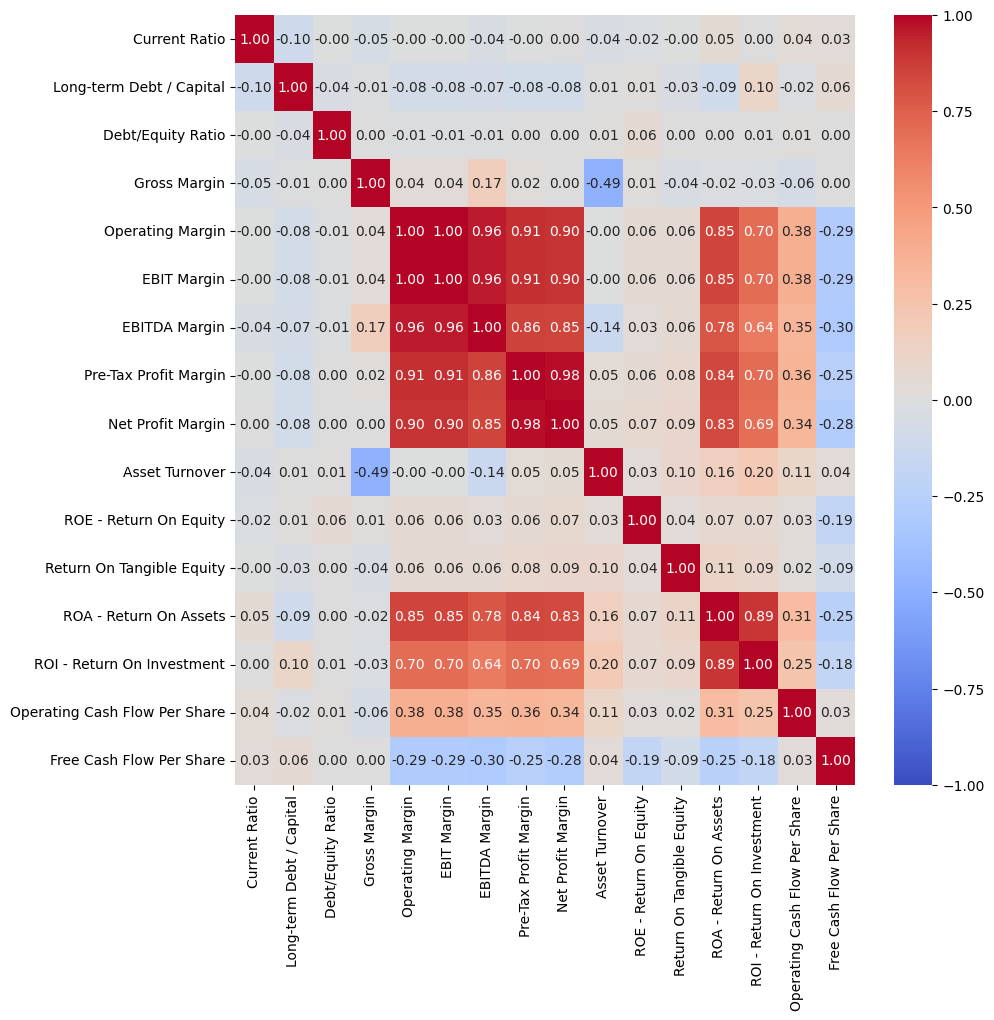

In [12]:
cols_to_keep = ['Current Ratio', 'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin', 
                'Operating Margin', 'EBIT Margin', 'EBITDA Margin', 'Pre-Tax Profit Margin', 
                'Net Profit Margin', 'Asset Turnover', 'ROE - Return On Equity', 
                'Return On Tangible Equity', 'ROA - Return On Assets', 
                'ROI - Return On Investment', 'Operating Cash Flow Per Share', 
                'Free Cash Flow Per Share']


df_subset = df[cols_to_keep]
correlation_matrix = df_subset.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, cbar=True, vmin=-1, vmax=1, fmt=".2f")
# plt.title('Korrelationsmatrix der Finanzkennzahlen', fontsize=20)
plt.show()


### Skewness analysis

Current Ratio                     5.81
Long-term Debt / Capital         -6.17
Debt/Equity Ratio               -17.23
Gross Margin                      0.31
Operating Margin                 -7.91
EBIT Margin                      -7.90
EBITDA Margin                    -6.53
Pre-Tax Profit Margin            -7.26
Net Profit Margin                -7.64
Asset Turnover                    2.19
ROE - Return On Equity           -4.09
Return On Tangible Equity        14.83
ROA - Return On Assets           -5.15
ROI - Return On Investment       -3.16
Operating Cash Flow Per Share     1.52
Free Cash Flow Per Share          6.73
dtype: float64


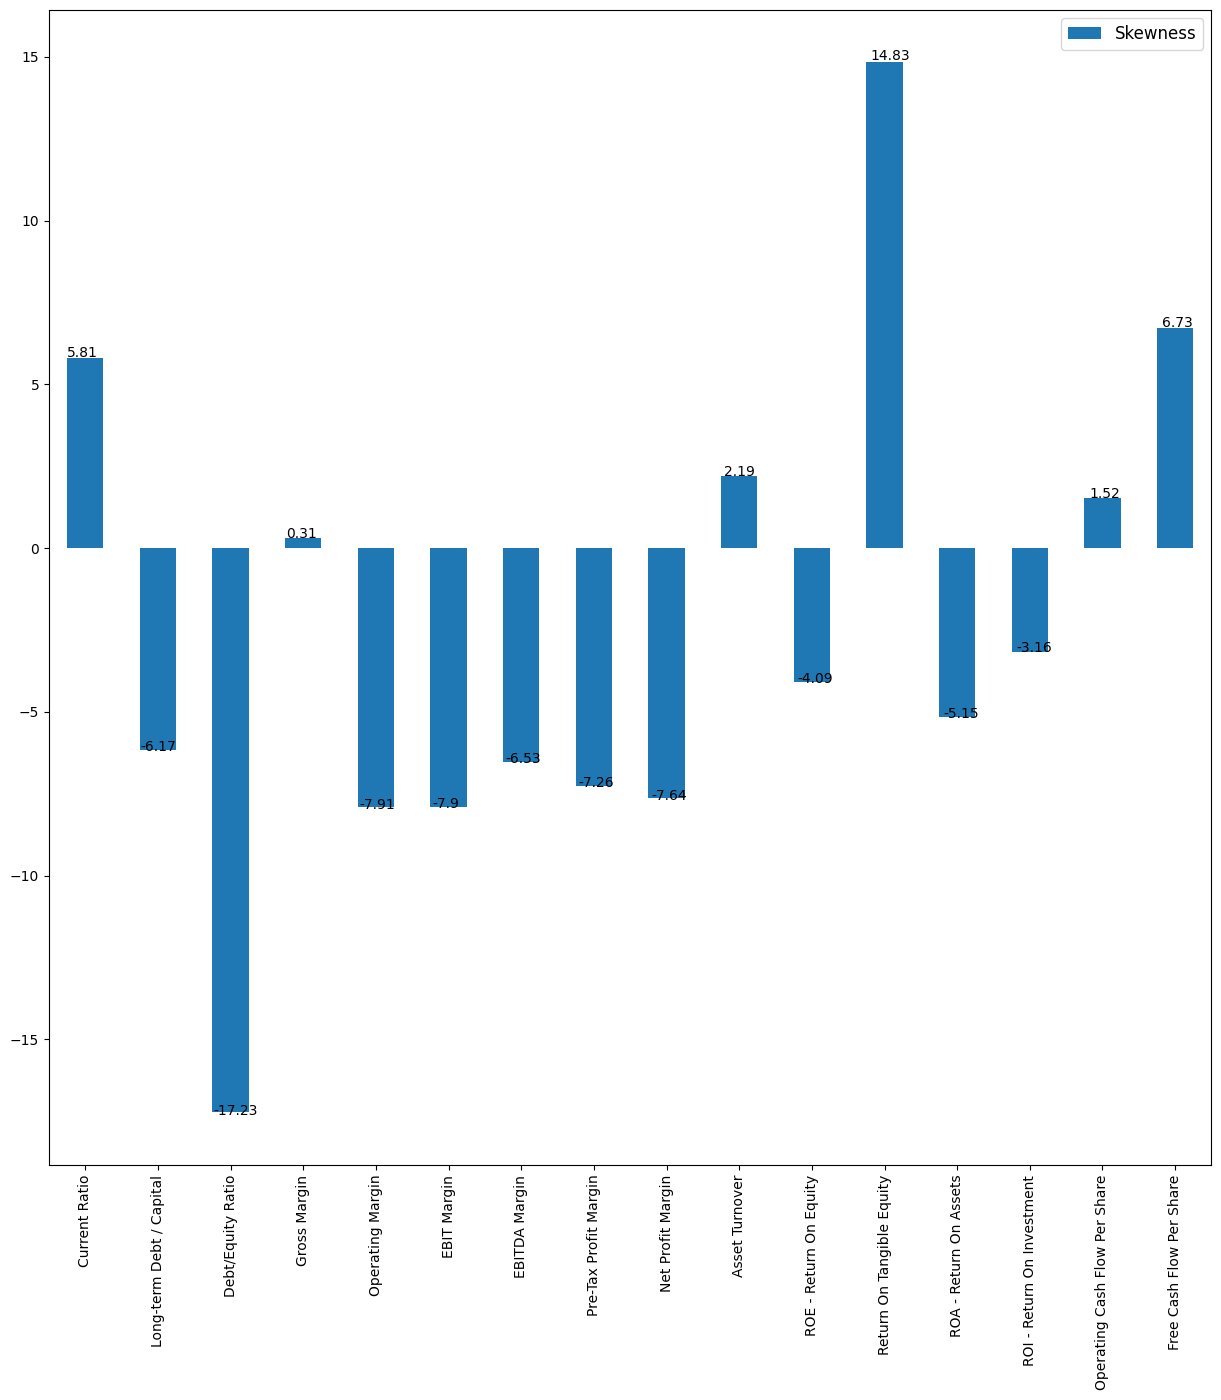

In [35]:
skewness_graph = df_subset.skew().round(2)

print(skewness_graph)

# plt.figure(figsize=(10, 10))
# sns.countplot(data=skewness_graph.values, y=skewness_graph.index, palette=color_palette)
# plt = skewness_graph.plot.bar(x=skewness_graph.index, y=skewness_graph.values)
ax = skewness_graph.plot(kind='bar', figsize=(15, 15))
ax.set_xticklabels(labels=skewness_graph.index, rotation=90)
ax.legend(['Skewness'], fontsize=12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
# plt.show()

## Mean Analysis for numeric columns on sector level

In [17]:
df.columns

cols_mean = ['Sector', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share']

df_analysis = df[cols_mean].groupby(by='Sector').median()

df_analysis

,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
Sector,,,,,,,,,,,,,,,,
Andere,1.5486,0.4251,0.7241,33.9789,10.1243,10.1361,16.5785,7.9630,6.2549,0.6158,11.97210,11.0633,4.3309,7.2466,0.1975,0.0409
Chemie,1.9787,0.4016,0.7990,26.5517,11.0088,11.0088,14.6970,9.2907,7.1340,0.8340,16.89110,16.3110,6.1338,10.0365,0.3742,0.0543
Einzelhandel,1.3462,0.4176,0.6921,24.9075,5.6663,5.7487,7.8155,4.3452,3.0081,1.6153,13.09760,17.4966,5.0048,9.0589,0.4395,0.1457
Energie,1.2965,0.3107,0.4773,56.8867,12.5334,12.6148,24.6973,9.4007,5.6828,0.4738,9.01910,9.4307,4.1620,5.9725,0.4796,0.0570
Finanzen,1.1802,0.5852,0.8842,53.6539,18.0082,18.4912,31.3173,9.4686,9.0947,0.4546,9.42830,-5.1404,3.4508,6.0527,0.2156,0.1701
Gebrauchsgüter,1.5125,0.5937,1.2407,16.6831,7.2403,7.2403,12.6488,5.3424,4.4458,1.1406,18.62690,3.5902,5.6823,9.4684,0.2676,0.1088
Geschäftsausstattung,1.8571,0.2995,0.4773,44.7625,14.6754,14.6754,21.8414,12.3579,9.6689,0.6079,13.56290,14.0171,6.0086,9.3118,0.2058,0.2260
Gesundheit,1.6312,0.3479,0.5581,68.5503,16.8244,17.0568,22.3875,13.6160,12.1839,0.5702,15.76760,15.8530,6.6656,9.1294,0.2949,0.2099
Herstellung,2.0184,0.3699,0.6651,26.0841,9.2850,9.3000,13.1852,7.4727,5.6224,0.9126,14.04460,15.7811,5.3115,8.1336,0.1868,0.0982
